# CARGA DE LIBRERIAS

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from keras.optimizers import Adam
from vecstack import stacking
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

C:\Users\krato\AppData\Local\conda\conda\envs\gpu2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\krato\AppData\Local\conda\conda\envs\gpu2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\krato\AppData\Local\conda\conda\envs\gpu2\lib\site-packages\xgboost\__init__.py:28: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [0]:
print("Versión Pandas: ", pd.__version__)
print("Versión Seaborn: ", sns.__version__)
print("Versión Numpy: ", np.__version__)
print("Version Keras: ", keras.__version__)

Versión Pandas:  0.23.0
Versión Seaborn:  0.9.0
Versión Numpy:  1.16.3
Version Keras:  2.2.4


# CARGA DE DATOS

Set de datos que describe el uso de las bicicletas compartidas en la ciudad de Londres. 
Descripción de la base de datos:
*  Temperatura
*  Sensación térmica
*  Humedad
*  Velocidad del viento
*  Clima
*  Días festivos
*  Día de la semana
*  Hora del día
*  Estación del año

In [0]:
bike = pd.read_csv('london_merged.csv')

# LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

In [0]:
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Datos estadísticos de la base de datos, donde se pueden apreciar:
*  Número de datos
*  Media
*  Deviación estandar
*  Valor mínimo y máximo

In [0]:
bike.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [0]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


## COMPROBAR AUSENCIA DE DATOS

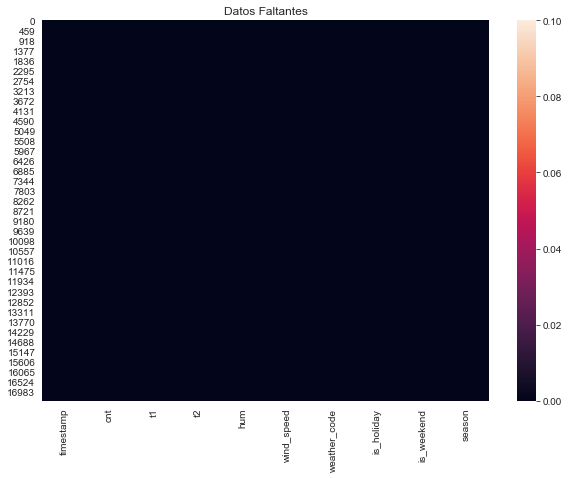

In [0]:
plt.figure(figsize=(10,7))
sns.heatmap(bike.isnull(), vmin=0.0, vmax=0.1).set_title("Datos Faltantes")
plt.show()

## PREPROCESAMIENTO DE DATOS

Indexar la columna de "Timestamp" para futuro analisis de datos

In [0]:
bike.timestamp = pd.to_datetime(bike.timestamp, format = '%Y/%m/%d %H:%M:%S')

In [0]:
bike.index = pd.DatetimeIndex(bike.timestamp)

In [0]:
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Revisar los diferentes climas que se encuentra en el conjunto de datos

In [0]:
bike['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

Se divide el código de los diferentes climas en 2

In [0]:
weather_dict = {1 : 1,  2 : 1,  3 : 1,  4 : 1, 
                7 : 2, 10 : 2, 26 : 2, 94 : 2}
bike['weather_code_en']=bike['weather_code'].replace(weather_dict)

In [0]:
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weather_code_en
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1.0


Se agregan nuevas columnas para la base de datos para futuro analisis:
*   Mes
*   Año
*   Dia
*   Hora
*   Dia libre
*   Hora sin luz





In [0]:
bike['month'] = bike['timestamp'].apply(lambda row:row.month)
bike['year'] = bike['timestamp'].apply(lambda row:row.year)
bike['day'] = bike['timestamp'].apply(lambda row:row.day)
bike['day_of_week']=bike['timestamp'].apply(lambda day: day.dayofweek)
bike['hour'] = bike['timestamp'].apply(lambda row:row.hour)
bike['is_non_workday'] = bike['is_holiday'] + bike['is_weekend']
bike['no_light'] = bike['hour'].apply(lambda val: 1 if val < 8 or val > 20 else 0)

In [0]:
bike = bike.drop(labels = ['timestamp'], axis = 1)

In [0]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weather_code_en,month,year,day,day_of_week,hour,is_non_workday,no_light
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1.0,1,2015,4,6,0,1.0,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1.0,1,2015,4,6,1,1.0,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1.0,1,2015,4,6,2,1.0,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1.0,1,2015,4,6,3,1.0,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1.0,1,2015,4,6,4,1.0,1


Codificando características cíclicas. Para esta parte se crearan 4 nuevas características:

*   Seno para la hora del día.
*   Coseno para la hora del día.
*   Coseno para el mes del año.
*   Seno para el mes del año.




In [0]:
bike['hour_cos'] = bike['hour'].apply(lambda hour: np.cos(2 * np.pi * hour/23))
bike['hour_sin'] = bike['hour'].apply(lambda hour: np.sin(2 * np.pi * hour/23))
bike['month_cos'] = bike['month'].apply(lambda month: np.cos(2 * np.pi * month/12))
bike['month_sin'] = bike['month'].apply(lambda month: np.sin(2 * np.pi * month/12))

Correlación de las diferentes columnas.

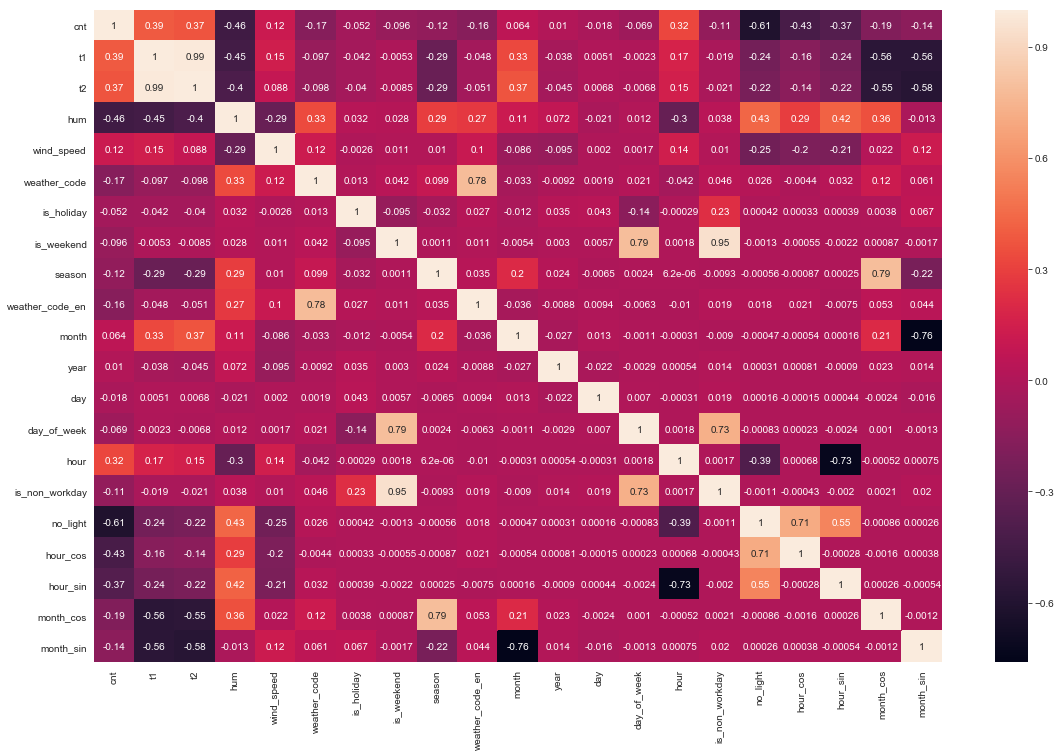

In [0]:
plt.figure(figsize = (19,12))
sns.heatmap(bike.corr(), annot =True)
plt.show()

# VISUALIZACIÓN DE LOS DATOS

## VISUALIZACIÓN DEL USO DE LA BICICLETA POR SEMANA/MES/TRIMESTRE



Se analiza el uso de la bicicleta por semana.

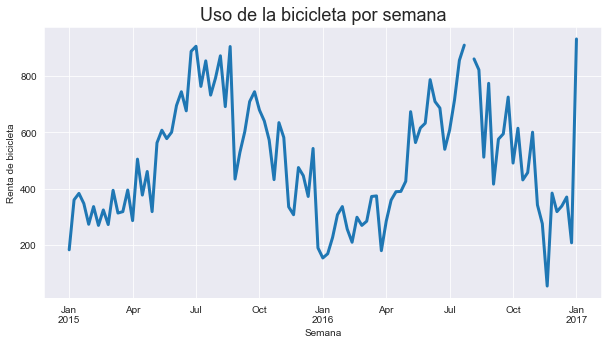

In [0]:
plt.figure(figsize = (10,5))
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Uso de la bicicleta por semana', fontsize = 18)
plt.xlabel('Semana')
plt.ylabel('Renta de bicicleta')
plt.show()

Se analiza el uso de la bicicleta por mes.

Text(0,0.5,'Renta de Bicicletas')

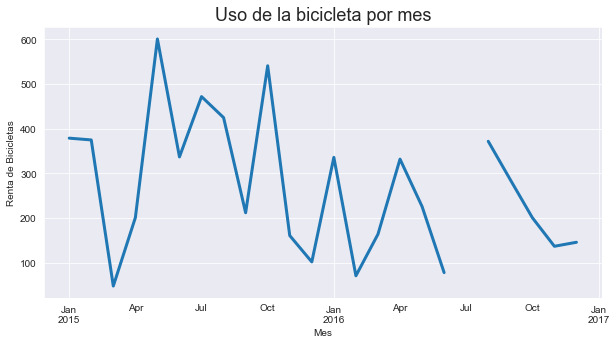

In [0]:
plt.figure(figsize = (10,5))
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Uso de la bicicleta por mes', fontsize = 18)
plt.xlabel('Mes')
plt.ylabel('Renta de Bicicletas')

Se analiza el uso de la bicicleta por trimestre.

Text(0,0.5,'Renta de Bicicleta')

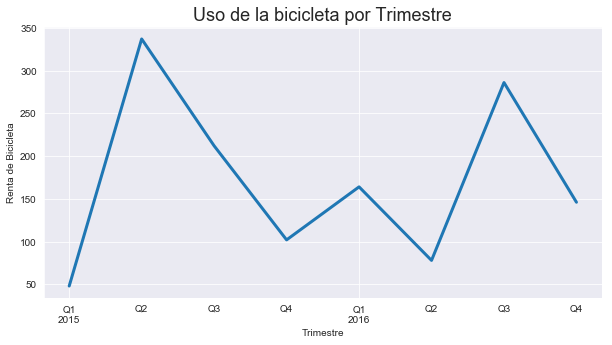

In [0]:
plt.figure(figsize = (10,5))
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Uso de la bicicleta por Trimestre', fontsize = 18)
plt.xlabel('Trimestre')
plt.ylabel('Renta de Bicicleta')

## VISUALIZACIÓN DEL USO DE LA BICICLETA POR HORA

Uso de la Bicicleta por Hora.

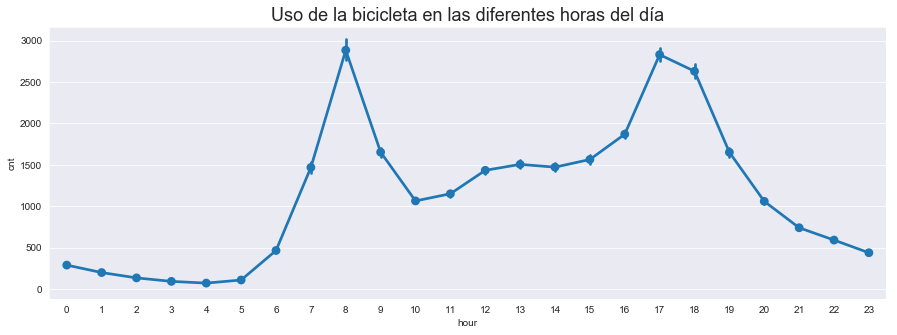

In [0]:
plt.figure(figsize = (15,5))
sns.pointplot(data = bike, x = 'hour', y = 'cnt')
plt.title('Uso de la bicicleta en las diferentes horas del día', fontsize = 18)
plt.show()

Uso de la Bicicleta por Hora, considerando si es festivo.



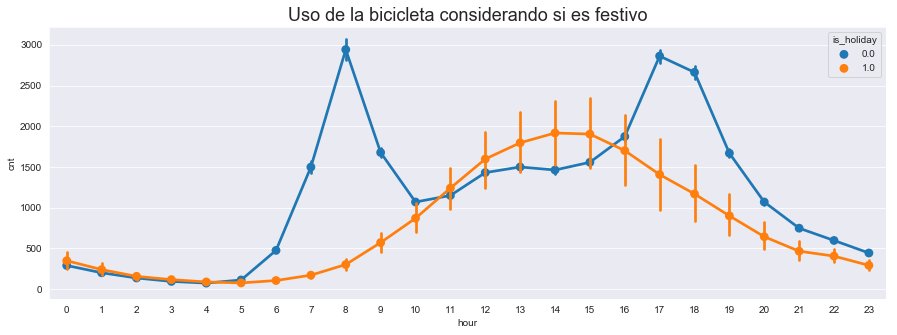

In [0]:
plt.figure(figsize = (15,5))
sns.pointplot(data = bike, x = 'hour', y = 'cnt', hue = 'is_holiday')
plt.title('Uso de la bicicleta considerando si es festivo', fontsize = 18)
plt.show()

Uso de la Bicicleta por Hora (Considerando Fin de semana)

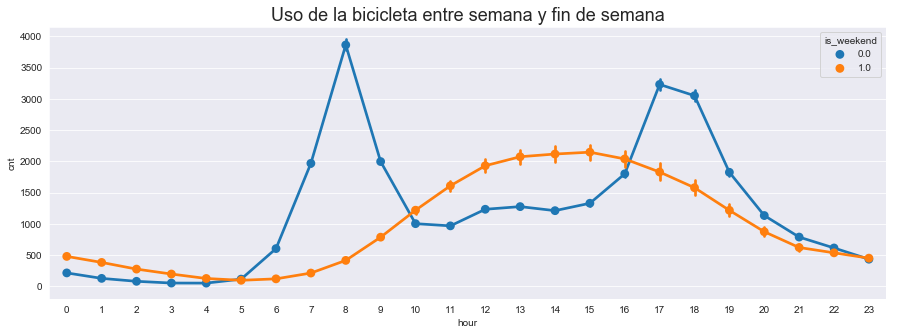

In [0]:
plt.figure(figsize = (15,5))
sns.pointplot(data = bike, x = 'hour', y = 'cnt', hue = 'is_weekend')
plt.title('Uso de la bicicleta entre semana y fin de semana', fontsize = 18)
plt.show()

Uso de la Bicicleta por Hora en las diferentes estaciones del año.

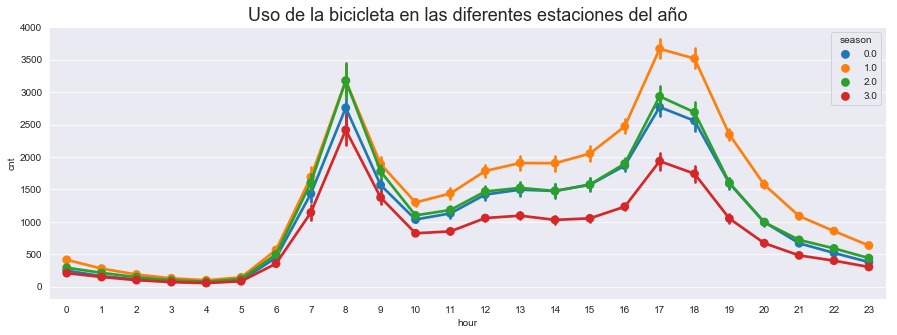

In [0]:
plt.figure(figsize = (15,5))
sns.pointplot(data = bike, x = 'hour', y = 'cnt', hue = 'season')
plt.title('Uso de la bicicleta en las diferentes estaciones del año', fontsize = 18)
plt.show()

Uso de la Bicicleta por Hora en las diferentes condiciones climáticas.

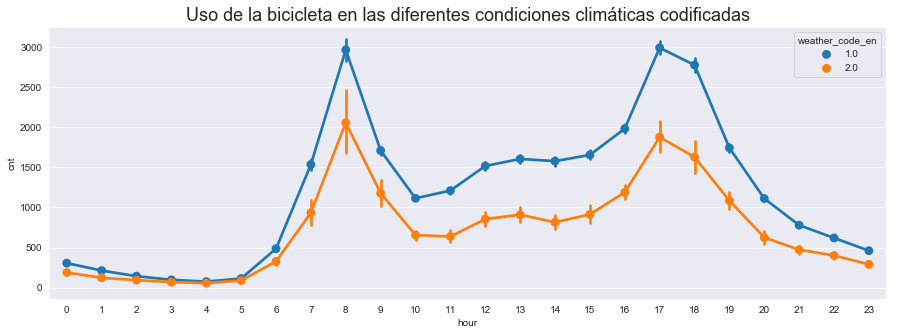

In [0]:
plt.figure(figsize = (15,5))
sns.pointplot(data = bike, x = 'hour', y = 'cnt', hue = 'weather_code_en')
plt.title('Uso de la bicicleta en las diferentes condiciones climáticas codificadas', fontsize = 18)
plt.show()

Uso de bicicleta por día de la semana con respecto al clima

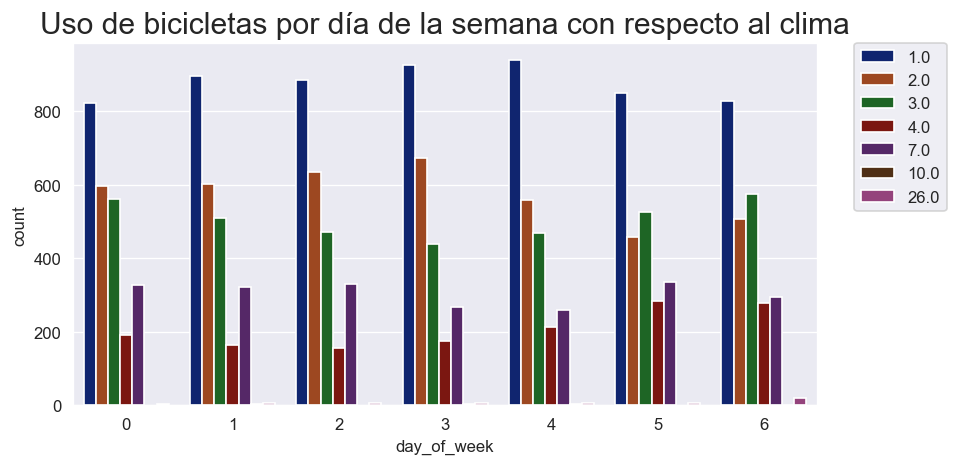

In [0]:
plt.figure(figsize=(8,4), dpi=120)
sns.countplot(x='day_of_week',hue='weather_code',data=bike,palette='dark')
plt.title('Uso de bicicletas por día de la semana con respecto al clima', fontsize=18)
# Reubicar la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Número de bicicletas con respecto a los diferentes climas.

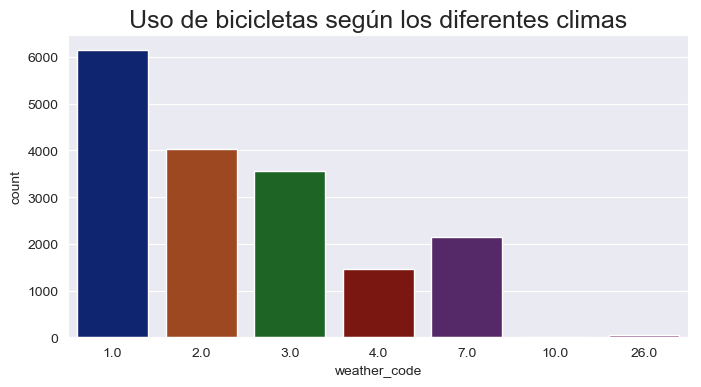

In [0]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(x='weather_code',data=bike,palette='dark')
plt.title('Uso de bicicletas según los diferentes climas', fontsize=18)
plt.show()

# ENTRENAMIENTO DE LOS MODELOS PREDICTIVOS

En esta sección se entrenan diferentes algoritmos de Aprendizaje Automático. 
Se despliegan los datos que se utilizarán para alimentar los modelos.

In [0]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weather_code_en,...,year,day,day_of_week,hour,is_non_workday,no_light,hour_cos,hour_sin,month_cos,month_sin
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1.0,...,2015,4,6,0,1.0,1,1.000000,0.000000,0.866025,0.5
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1.0,...,2015,4,6,1,1.0,1,0.962917,0.269797,0.866025,0.5
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1.0,...,2015,4,6,2,1.0,1,0.854419,0.519584,0.866025,0.5
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1.0,...,2015,4,6,3,1.0,1,0.682553,0.730836,0.866025,0.5
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1.0,...,2015,4,6,4,1.0,1,0.460065,0.887885,0.866025,0.5


## PREPROCESAMIENTO DE DATOS PARA ALIMENTAR A LOS MODELOS

Se debe realizar un último preprocesamiento de datos. 
Las columnas que son categóricas deben de codificarse.

In [0]:
bike = bike.drop(labels = ['weather_code', 'day'], axis = 1)

In [0]:
columns = ['weather_code_en','season','is_non_workday', 'year', 'month', 'day_of_week']
bike = pd.get_dummies(bike, columns=columns, drop_first = True)

In [0]:
X = bike.drop(labels = ['cnt'], axis = 1)
y = bike['cnt']

In [0]:
X_numerical = X[['t1', 't2', 'hum', 'wind_speed']]

Escalar los datos para alimentar el modelo.

In [0]:
scaler_x = MinMaxScaler()
X_numerical = pd.DataFrame(scaler_x.fit_transform(X_numerical), columns = X_numerical.columns)

In [0]:
X = X.drop(labels = ['t1', 't2', 'hum', 'wind_speed'], axis = 1)

In [0]:
X = X.reset_index()
X_all = pd.concat([X, X_numerical], axis = 1)
X_all = X_all.drop(labels=['timestamp'], axis = 1)

Forma final de los datos para poder realizar el entrenamiento de los algoritmos.

In [0]:
X_all.head()

,is_holiday,is_weekend,hour,no_light,hour_cos,hour_sin,month_cos,month_sin,weather_code_en_2.0,season_1.0,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,t1,t2,hum,wind_speed
0,0.0,1.0,0,1,1.000000,0.000000,0.866025,0.5,0,0,...,0,0,0,0,0,1,0.126761,0.2000,0.911950,0.106195
1,0.0,1.0,1,1,0.962917,0.269797,0.866025,0.5,0,0,...,0,0,0,0,0,1,0.126761,0.2125,0.911950,0.088496
2,0.0,1.0,2,1,0.854419,0.519584,0.866025,0.5,0,0,...,0,0,0,0,0,1,0.112676,0.2125,0.955975,0.000000
3,0.0,1.0,3,1,0.682553,0.730836,0.866025,0.5,0,0,...,0,0,0,0,0,1,0.098592,0.2000,1.000000,0.000000
4,0.0,1.0,4,1,0.460065,0.887885,0.866025,0.5,0,0,...,0,0,0,0,0,1,0.098592,0.1500,0.911950,0.115044


In [0]:
X = X_all.values
y = y.values
y = y.reshape(-1,1)

In [0]:
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

Para el entrenamiento de los modelos se divide el conjunto de datos en 2: entrenamiento y prueba. El 70% de los datos del dataset corresponde a los datos de entrenamiento, mientras que para la evaluación de resultados se usará el 30% restante.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)

In [0]:
print('Dimensiones de X para los datos de entrenamiento: ', X_train.shape)
print('Dimensiones de y para los datos de entrenamiento: ', y_train.shape)
print('Dimensiones de X para los datos de prueba: ', X_test.shape)
print('Dimensiones de y para los datos de prueba: ', y_test.shape)

Dimensiones de X para los datos de entrenamiento:  (12189, 36)
Dimensiones de y para los datos de entrenamiento:  (12189, 1)
Dimensiones de X para los datos de prueba:  (5225, 36)
Dimensiones de y para los datos de prueba:  (5225, 1)


## RANDOM FOREST REGRESSOR

El primer modelo es un algoritmo de bosque aleatorio. Se hace uso de una búsqueda de malla para la optimización de hiper-parámetros, así como el uso de la validación cruzada. 

In [0]:
# Se inicializa el modelo.
forest = RandomForestRegressor(random_state = 60)
# Se eligen los hiper-parámetros a optimizar mediante el uso de la búsqueda de malla.
params_forest = {'max_depth':[None,1,3], 'min_samples_leaf':[1,0.04,0.5],
            'min_samples_split':[2,3], 'n_estimators':[100,300,700]}
# Búsque da los mejores hiper-parámetros con validación cruzada. 
forest_cv = GridSearchCV(forest, param_grid = params_forest, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
forest_cv.fit(X_train, y_train.reshape(-1))

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=60, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 0.04, 0.5], 'n_estimators': [100, 300, 700], 'min_samples_split': [2, 3], 'max_depth': [None, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
print('Mejores hiper-parámetros encontrados: ', forest_cv.best_params_)
print('Mejor desempeño encontrado: {:.4f}'.format(forest_cv.best_score_))

Mejores hiper-parámetros encontrados:  {'min_samples_leaf': 1, 'n_estimators': 700, 'min_samples_split': 2, 'max_depth': None}
Mejor desempeño encontrado: -0.0011


Mejor modelo encontrado por la búsqueda de malla.

In [0]:
best_forest = forest_cv.best_estimator_

### Importancia de las características para el algoritmo de bosque aleatorio.

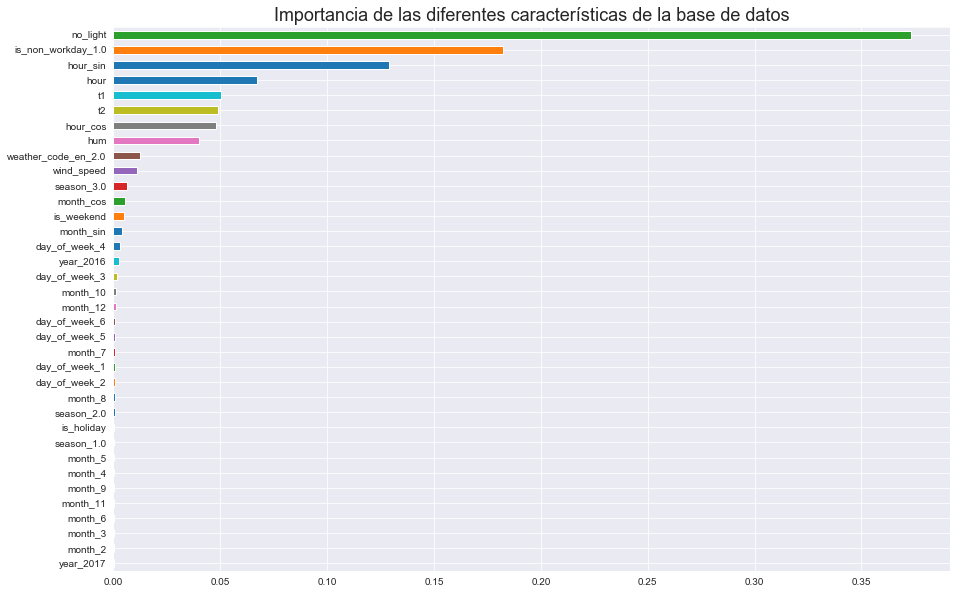

In [0]:
importances_forest = pd.Series(best_forest.feature_importances_, index = X_all.columns)
sorted_importances_forest = importances_forest.sort_values()
plt.figure(figsize=(15,10))
sorted_importances_forest.plot(kind = 'barh')
plt.title('Importancia de las diferentes características de la base de datos', fontsize=18)
plt.show()

### Desempeño de los diferentes hiper-parámetros en la búsque da de malla.

In [0]:
max_depth_forest = [item['max_depth'] for item in forest_cv.cv_results_['params']]
scores = list(forest_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth_forest, scores]).T
d.columns = ['Max Depth', 'Score']
d.groupby(['Max Depth']).mean()

,Score
Max Depth,
1.0,-0.014507
3.0,-0.011699


In [0]:
min_samples_forest = [item['min_samples_leaf'] for item in forest_cv.cv_results_['params']]
scores = list(forest_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([min_samples_forest, scores]).T
d.columns = ['Min Samples Leaf', 'Score']
d.groupby(['Min Samples Leaf']).mean()

,Score
Min Samples Leaf,
0.04,-0.009577
0.50,-0.019302
1.00,-0.006732


In [0]:
estimators_forest = [item['n_estimators'] for item in forest_cv.cv_results_['params']]
scores = list(forest_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([estimators_forest, scores]).T
d.columns = ['N estimators', 'Score']
d.groupby(['N estimators']).mean()

,Score
N estimators,
100.0,-0.011884
300.0,-0.011863
700.0,-0.011865


## DECISION TREE REGRESSOR

El segundo modelo es un árbol de decisiones. Se hace uso de una búsqueda mallada para la optimización de hiper-parámetros, así como el uso de la validación cruzada. 

In [0]:
# Se inicializa el modelo.
tree = DecisionTreeRegressor(random_state=60)
# Se eligen los hiper-parámetros a optimizar mediante el uso de la búsqueda mallada.
params_dt = {'max_depth':[None,3,4], 'max_features':[None, 0.2,0.4], 'min_samples_leaf':[1,0.04,0.5],
            'min_samples_split':[2,3,4,5]}
# Búsque da los mejores hiper-parámetros con validación cruzada. 
tree_cv = GridSearchCV(tree, param_grid = params_dt, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=60, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 0.2, 0.4], 'min_samples_leaf': [1, 0.04, 0.5], 'min_samples_split': [2, 3, 4, 5], 'max_depth': [None, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
print('Mejores hiper-parámetros encontrados: ', tree_cv.best_params_)
print('Mejor desempeño encontrado: {:.4f}'.format(tree_cv.best_score_))

Mejores hiper-parámetros encontrados:  {'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'max_depth': None}
Mejor desempeño encontrado: -0.0020


Mejor modelo encontrado por la búsqueda de malla.

In [0]:
best_tree = tree_cv.best_estimator_

### Importancia de las características para el árbol de decisiones.

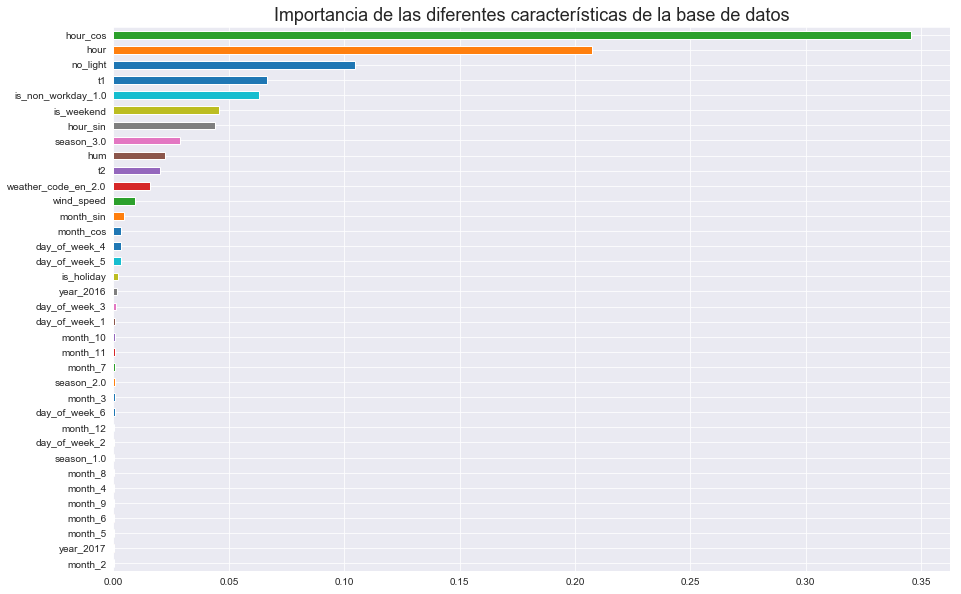

In [0]:
importances_tree = pd.Series(best_tree.feature_importances_, index = X_all.columns)
sorted_importances_tree = importances_tree.sort_values()
plt.figure(figsize=(15,10))
sorted_importances_tree.plot(kind = 'barh')
plt.title('Importancia de las diferentes características de la base de datos', fontsize=18)
plt.show()

### Desempeño de los diferentes hiper-parámetros en la búsque da de malla.

In [0]:
max_depth_tree = [item['max_depth'] for item in tree_cv.cv_results_['params']]
scores = list(tree_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth_tree, scores]).T
d.columns = ['Max Depth', 'Score']
d.groupby(['Max Depth']).mean()

,Score
Max Depth,
3.0,-0.012956
4.0,-0.011983


In [0]:
min_samples_tree = [item['min_samples_leaf'] for item in tree_cv.cv_results_['params']]
scores = list(tree_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([min_samples_tree, scores]).T
d.columns = ['Min Samples Leaf', 'Score']
d.groupby(['Min Samples Leaf']).mean()

,Score
Min Samples Leaf,
0.04,-0.008924
0.50,-0.019302
1.00,-0.006527


In [0]:
min_samples_split_tree = [item['min_samples_split'] for item in tree_cv.cv_results_['params']]
scores = list(tree_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([min_samples_split_tree, scores]).T
d.columns = ['Min Samples Split', 'Score']
d.groupby(['Min Samples Split']).mean()

,Score
Min Samples Split,
2.0,-0.011593
3.0,-0.011575
4.0,-0.011587
5.0,-0.011581


## BAGGING REGRESSOR

El tercer algoritmo es un modelo predictivo que usa la técnica "Bagging". Esta técnica consiste en crear diferentes modelos usando muestras aleatorias con reemplazo y luego combinar o ensamblar los resultados.

In [0]:
# Se inicializa el modelo.
bagging = BaggingRegressor(random_state = 60)
# Se eligen los hiper-parámetros a optimizar mediante el uso de la búsqueda mallada.
params_bagging = {'n_estimators':[100,500], 'max_features':[0.1,0.5,1.0], 'max_samples':[0.7,1.0]}
# Búsque da los mejores hiper-parámetros con validación cruzada. 
bagging_cv = GridSearchCV(bagging, param_grid = params_bagging, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
bagging_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=60,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.1, 0.5, 1.0], 'max_samples': [0.7, 1.0], 'n_estimators': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
print('Mejores hiper-parámetros encontrados: ', bagging_cv.best_params_)
print('Mejor desempeño encontrado: {:.4f}'.format(bagging_cv.best_score_))

Mejores hiper-parámetros encontrados:  {'max_features': 1.0, 'n_estimators': 500, 'max_samples': 0.7}
Mejor desempeño encontrado: -0.0011


Mejor modelo encontrado por la búsqueda de malla.

In [0]:
best_bagging = bagging_cv.best_estimator_

### Importancia de las características para el modelo "Bagging".

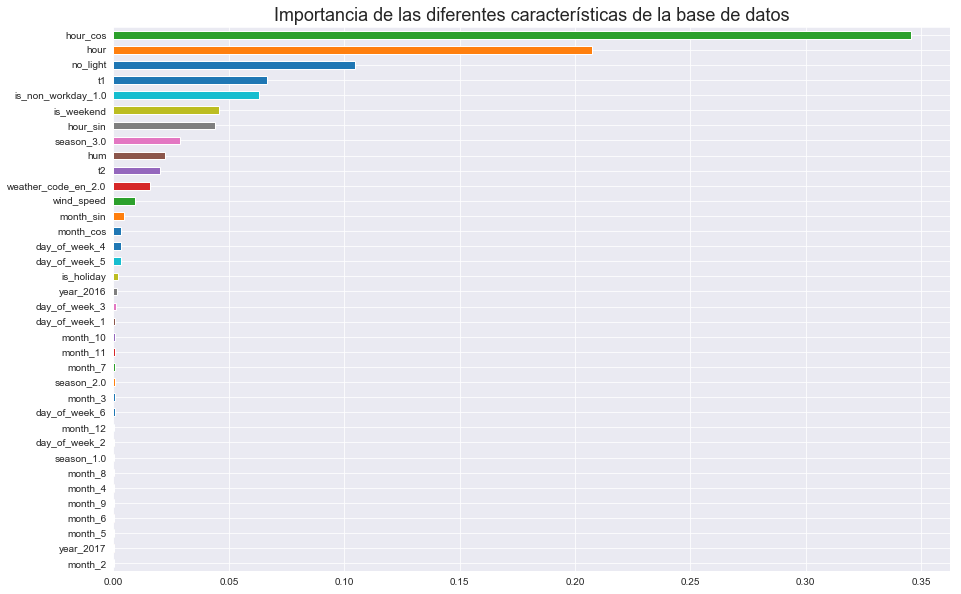

In [0]:
feature_importances = np.mean([best_tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
importances_bagging = pd.Series(feature_importances, index = X_all.columns)
sorted_importances_bagging = importances_bagging.sort_values()
plt.figure(figsize=(15,10))
sorted_importances_bagging.plot(kind = 'barh')
plt.title('Importancia de las diferentes características de la base de datos', fontsize=18)
plt.show()

### Resultados de la búsqueda de malla de los diferentes hiper-parámetros.

In [0]:
max_features_bagging = [item['max_features'] for item in bagging_cv.cv_results_['params']]
scores = list(bagging_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([max_features_bagging, scores]).T
d.columns = ['Max Features', 'Score']
d.groupby(['Max Features']).mean()

,Score
Max Features,
0.1,-0.012191
0.5,-0.001682
1.0,-0.001084


In [0]:
max_samples_bagging = [item['max_samples'] for item in bagging_cv.cv_results_['params']]
scores = list(bagging_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([max_samples_bagging, scores]).T
d.columns = ['Max Samples', 'Score']
d.groupby(['Max Samples']).mean()

,Score
Max Samples,
0.7,-0.004987
1.0,-0.004984


In [0]:
estimators_bagging = [item['n_estimators'] for item in bagging_cv.cv_results_['params']]
scores = list(bagging_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([estimators_bagging, scores]).T
d.columns = ['N estimators', 'Score']
d.groupby(['N estimators']).mean()

,Score
N estimators,
100.0,-0.005055
500.0,-0.004917


## XGB REGRESSOR

El cuarto algoritmo es un eficiente modelo de árboles aumentados de gradientes. La potenciación de gradientes es un algoritmo de aprendizaje supervisado que intenta predecir de forma apropiada una variable de destino mediante la combinación de un conjunto de estimaciones a partir de un conjunto de modelos más simples y más débiles.

In [0]:
# Se inicializa el modelo.
xgb = XGBRegressor(random_state = 60)
# Se eligen los hiper-parámetros a optimizar mediante el uso de la búsqueda de malla.
params_xgb = {'learning_rate':[0.1,0.3,0.5], 'n_estimators':[300,500],'max_depth':[3,6,10]}
# Búsque da los mejores hiper-parámetros con validación cruzada. 
xgb_cv = GridSearchCV(xgb, param_grid = params_xgb, cv=2, scoring = 'neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [3, 6, 10], 'n_estimators': [300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
print('Mejores hiper-parámetros encontrados: ', xgb_cv.best_params_)
print('Mejor desempeño encontrado: {:.3f}'.format(xgb_cv.best_score_))

Mejores hiper-parámetros encontrados:  {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 6}
Mejor desempeño encontrado: -0.001


Mejor modelo encontrado por la búsqueda de malla.

In [0]:
best_xgb = xgb_cv.best_estimator_

### Importancia de las características para el modelo "XGB".

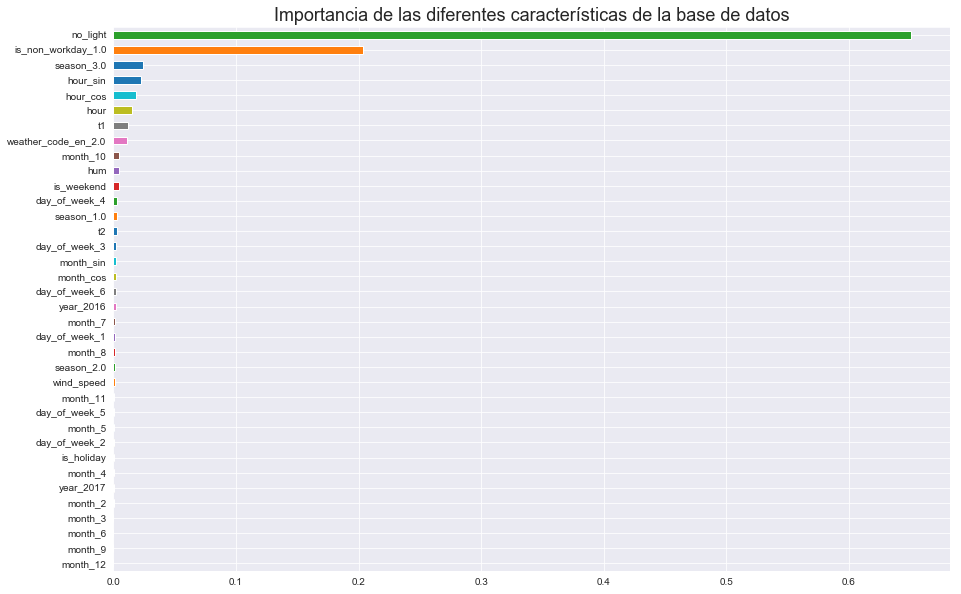

In [0]:
importances_xgb = pd.Series(best_xgb.feature_importances_, index = X_all.columns)
sorted_importances_xgb = importances_xgb.sort_values()
plt.figure(figsize=(15,10))
sorted_importances_xgb.plot(kind = 'barh')
plt.title('Importancia de las diferentes características de la base de datos', fontsize=18)
plt.show()

### Resultados de la búsqueda de malla de los diferentes hiper-parámetros.

In [0]:
max_depth_xgb = [item['max_depth'] for item in xgb_cv.cv_results_['params']]
scores = list(xgb_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth_xgb, scores]).T
d.columns = ['Max Depth', 'Score']
d.groupby(['Max Depth']).mean()

,Score
Max Depth,
3.0,-0.001089
6.0,-0.000958
10.0,-0.001082


In [0]:
learning_rate_xgb = [item['learning_rate'] for item in xgb_cv.cv_results_['params']]
scores = list(xgb_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([learning_rate_xgb, scores]).T
d.columns = ['Learning Rate', 'Score']
d.groupby(['Learning Rate']).mean()

,Score
Learning Rate,
0.1,-0.001003
0.3,-0.001017
0.5,-0.001110


In [0]:
estimators_xgb = [item['n_estimators'] for item in xgb_cv.cv_results_['params']]
scores = list(xgb_cv.cv_results_['mean_test_score'])
d = pd.DataFrame([estimators_xgb, scores]).T
d.columns = ['N estimators', 'Score']
d.groupby(['N estimators']).mean()

,Score
N estimators,
300.0,-0.001050
500.0,-0.001037


## RED NEURONAL

Red neuronal aritifical profunda. Se utilizaron 3 capas ocultas con función de activación "relu" y "Adam" como el optimizador de la red neuronal. 

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=100, activation='relu', input_shape=(36,)))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1, activation='linear'))
model.compile(optimizer=Adam(lr=1.5e-3), loss='mean_squared_error')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 24,001
Trainable params: 24,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs_hist = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Train on 9751 samples, validate on 2438 samples
Epoch 1/50
9751/9751 [==============================] - 3s 265us/step - loss: 0.0681 - val_loss: 0.0079
Epoch 2/50
9751/9751 [==============================] - 1s 144us/step - loss: 0.0066 - val_loss: 0.0049
Epoch 3/50
9751/9751 [==============================] - 1s 134us/step - loss: 0.0044 - val_loss: 0.0033
Epoch 4/50
9751/9751 [==============================] - 1s 131us/step - loss: 0.0034 - val_loss: 0.0028
Epoch 5/50
9751/9751 [==============================] - 1s 133us/step - loss: 0.0030 - val_loss: 0.0026
Epoch 6/50
9751/9751 [==============================] - 1s 133us/step - loss: 0.0026 - val_loss: 0.0021
Epoch 7/50
9751/9751 [==============================] - 1s 141us/step - loss: 0.0022 - val_loss: 0.0020
Epoch 8/50
9751/9751 [==============================] - 1s 137us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/50
9751/9751 [==============================] - 1s 134us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/50
9751

Gráfica del comportamiento del error durante el proceso de entrenamiento.

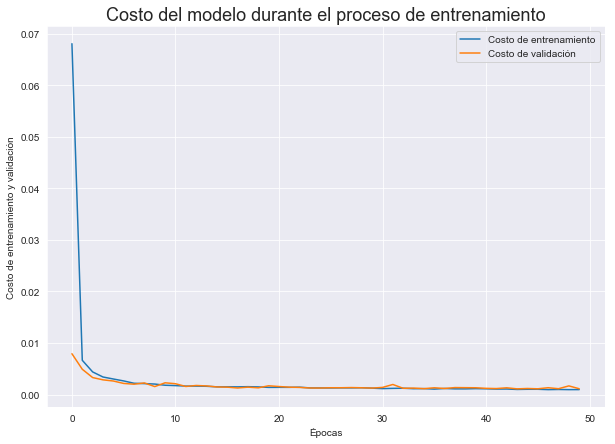

In [0]:
plt.figure(figsize=(10,7))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Costo del modelo durante el proceso de entrenamiento', fontsize = 18)
plt.xlabel('Épocas')
plt.ylabel('Costo de entrenamiento y validación')
plt.legend(['Costo de entrenamiento', 'Costo de validación'])
plt.show()

## STACK MODEL

El último modelo es un algoritmo de apilamiento. Dicho algoritmo toma las predicciones de modelos individuales para después combinarlos y producir un modelo mejorado.

In [0]:
modelos = [
    RandomForestRegressor(max_depth= None, min_samples_leaf= 1,
                          n_estimators= 700,random_state = 60),
    BaggingRegressor(random_state = 60, n_estimators=500),
    XGBRegressor(random_state=60, learning_rate=0.1,
                 n_estimators=500, max_depth=6)
]

In [0]:
S_train, S_test = stacking(modelos,X_train, y_train, X_test,
                           regression=True,mode='oof_pred_bag',
                           save_dir=None,metric=mean_absolute_error,
                           n_folds=4,shuffle=True,random_state=0,verbose=2)     

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]
    fold  0:  [0.01707889]
    fold  1:  [0.01641743]
    fold  2:  [0.01675770]
    fold  3:  [0.01719373]
    ----
    MEAN:     [0.01686194] + [0.00030233]
    FULL:     [0.01686196]

model  1:     [BaggingRegressor]
    fold  0:  [0.01710670]
    fold  1:  [0.01643506]
    fold  2:  [0.01676408]
    fold  3:  [0.01722835]
    ----
    MEAN:     [0.01688354] + [0.00030988]
    FULL:     [0.01688356]

model  2:     [XGBRegressor]
    fold  0:  [0.01544406]
    fold  1:  [0.01507494]
    fold  2:  [0.01566032]
    fold  3:  [0.01591783]
    ----
    MEAN:     [0.01552429] + [0.00030892]
    FULL:     [0.01552428]



In [0]:
model_stack = XGBRegressor(random_state=60, n_jobs=-1, learning_rate=0.1,n_estimators=300, max_depth=3)

In [0]:
model_stack = model_stack.fit(S_train, y_train)

# RESULTADOS

En esta sección se presentan los resultados de los diferentes modelos entrenados en los datos de prueba, que corresponden al 30% del total de datos.

## PREDICCIÓN DE LOS DATOS DE PRUEBA

In [0]:
y_predict_forest = best_forest.predict(X_test)
y_predict_tree = best_tree.predict(X_test)
y_predict_bagging = best_bagging.predict(X_test)
y_predict_xgb = best_xgb.predict(X_test)
y_predict_ann = model.predict(X_test)
y_predict_stack = model_stack.predict(S_test)

In [0]:
y_predict_orig_forest = scaler_y.inverse_transform(y_predict_forest.reshape(-1,1))
y_predict_orig_tree = scaler_y.inverse_transform(y_predict_tree.reshape(-1,1))
y_predict_orig_bagging = scaler_y.inverse_transform(y_predict_bagging.reshape(-1,1))
y_predict_orig_xgb = scaler_y.inverse_transform(y_predict_xgb.reshape(-1,1))
y_predict_orig_ann = scaler_y.inverse_transform(y_predict_ann)
y_predict_orig_stack = scaler_y.inverse_transform(y_predict_stack.reshape(-1,1))
y_test_orig = scaler_y.inverse_transform(y_test)

### R2 (Coeficiente de determinación)

In [0]:
r2_forest = float(format(r2_score(y_test_orig, y_predict_orig_forest),'.3f'))
r2_tree = float(format(r2_score(y_test_orig, y_predict_orig_tree),'.3f'))
r2_bagging = float(format(r2_score(y_test_orig, y_predict_orig_bagging),'.3f'))
r2_xgb = float(format(r2_score(y_test_orig, y_predict_orig_xgb),'.3f'))
r2_ann = float(format(r2_score(y_test_orig, y_predict_orig_ann),'.3f'))
r2_stack = float(format(r2_score(y_test_orig, y_predict_orig_stack),'.3f'))

### Raíz del error cuadrático medio

In [0]:
RMSE_forest = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_forest)),'.3f'))
RMSE_tree = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_tree)),'.3f'))
RMSE_bagging = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_bagging)),'.3f'))
RMSE_xgb = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_xgb)),'.3f'))
RMSE_ann = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_ann)),'.3f'))
RMSE_stack = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig_stack)),'.3f'))

### Error cuadrático medio

In [0]:
MSE_forest = float(format(mean_squared_error(y_test_orig, y_predict_orig_forest),'.3f'))
MSE_tree = float(format(mean_squared_error(y_test_orig, y_predict_orig_tree),'.3f'))
MSE_bagging = float(format(mean_squared_error(y_test_orig, y_predict_orig_bagging),'.3f'))
MSE_xgb = float(format(mean_squared_error(y_test_orig, y_predict_orig_xgb),'.3f'))
MSE_ann = float(format(mean_squared_error(y_test_orig, y_predict_orig_ann),'.3f'))
MSE_stack = float(format(mean_squared_error(y_test_orig, y_predict_orig_stack),'.3f'))

### Error absoluto medio

In [0]:
MAE_forest = float(format(mean_absolute_error(y_test_orig, y_predict_orig_forest),'.3f'))
MAE_tree = float(format(mean_absolute_error(y_test_orig, y_predict_orig_tree),'.3f'))
MAE_bagging = float(format(mean_absolute_error(y_test_orig, y_predict_orig_bagging),'.3f'))
MAE_xgb = float(format(mean_absolute_error(y_test_orig, y_predict_orig_xgb),'.3f'))
MAE_ann = float(format(mean_absolute_error(y_test_orig, y_predict_orig_ann),'.3f'))
MAE_stack = float(format(mean_absolute_error(y_test_orig, y_predict_orig_stack),'.3f'))

In [0]:
r2_all = [r2_forest, r2_tree, r2_bagging, r2_xgb, r2_ann, r2_stack]
RMSE_all = [RMSE_forest, RMSE_tree, RMSE_bagging, RMSE_xgb, RMSE_ann, RMSE_stack]
MSE_all = [MSE_forest, MSE_tree, MSE_bagging, MSE_xgb, MSE_ann, MSE_stack]
MAE_all = [MAE_forest, MAE_tree, MAE_bagging, MAE_xgb, MAE_ann, MAE_stack]
df_results = pd.DataFrame([r2_all, RMSE_all, MSE_all, MAE_all]).T
df_results.columns = ['R2', 'RMSE', 'MSE', 'MAE']
df_results.index = ['Bosque Aleatorio', 'Árbol de decisiones', 'Bagging', 'XGB', 'Red Neuronal', 'Apilamiento']

## PRESENTACIÓN DE RESULTADOS

In [0]:
df_results

,R2,RMSE,MSE,MAE
Bosque Aleatorio,0.960,214.658,46078.108,122.869
Árbol de decisiones,0.921,300.020,90011.776,171.526
Bagging,0.960,215.085,46261.413,123.390
XGB,0.965,198.658,39464.868,114.970
Red Neuronal,0.950,239.997,57598.363,150.501
Apilamiento,0.966,197.685,39079.492,111.556


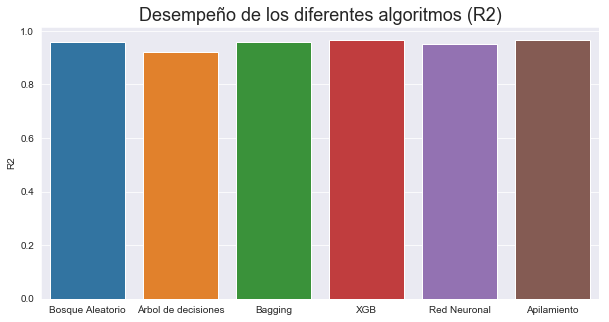

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x = df_results.index, y="R2", data=df_results)
plt.title('Desempeño de los diferentes algoritmos (R2)', fontsize=18)
plt.show()

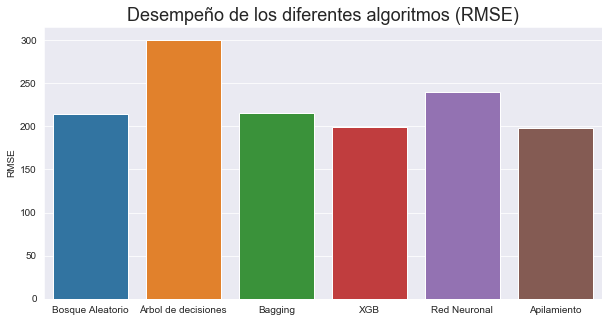

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x = df_results.index, y="RMSE", data=df_results)
plt.title('Desempeño de los diferentes algoritmos (RMSE)', fontsize=18)
plt.show()

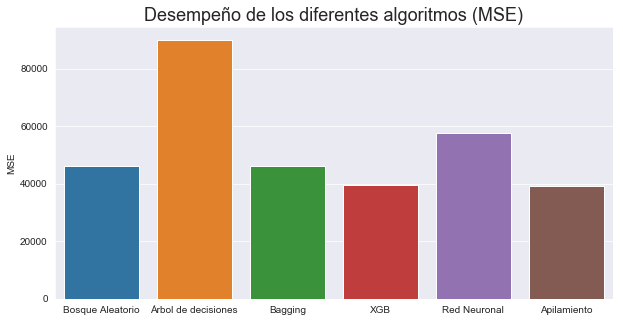

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x = df_results.index, y="MSE", data=df_results)
plt.title('Desempeño de los diferentes algoritmos (MSE)', fontsize=18)
plt.show()

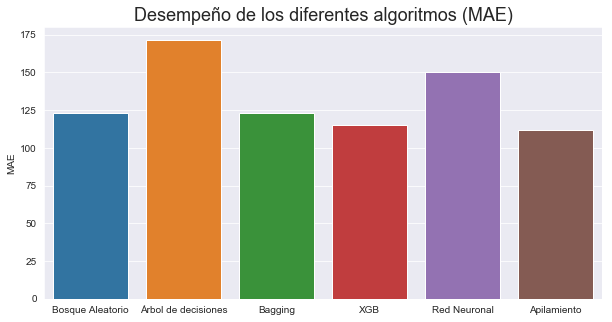

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x = df_results.index, y="MAE", data=df_results)
plt.title('Desempeño de los diferentes algoritmos (MAE)', fontsize=18)
plt.show()

## DESEMPEÑO DE LOS DIFERENTES MODELOS CON LOS DATOS DE PRUEBA

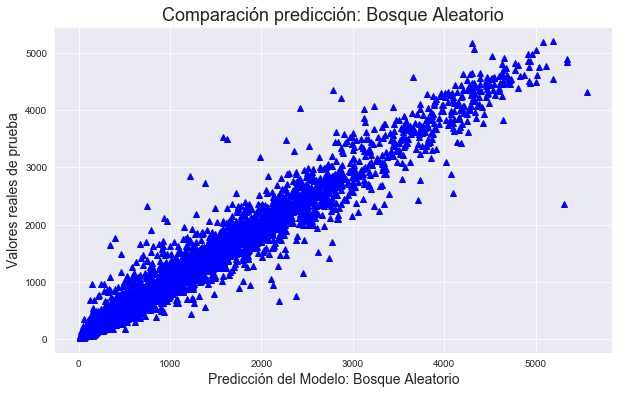

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_forest, "^", color = 'b')
plt.title('Comparación predicción: Bosque Aleatorio', fontsize = 18)
plt.xlabel('Predicción del Modelo: Bosque Aleatorio', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()

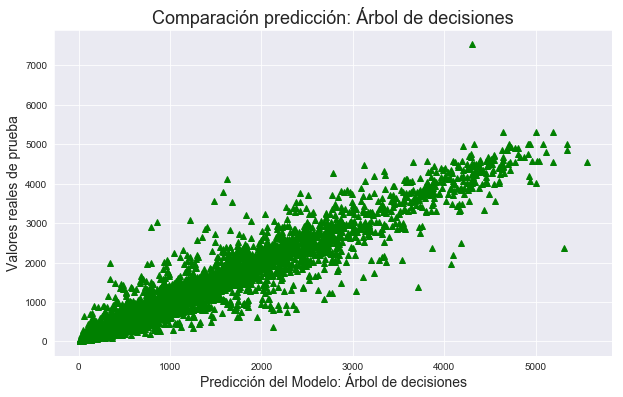

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_tree, "^", color = 'g')
plt.title('Comparación predicción: Árbol de decisiones', fontsize = 18)
plt.xlabel('Predicción del Modelo: Árbol de decisiones', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()

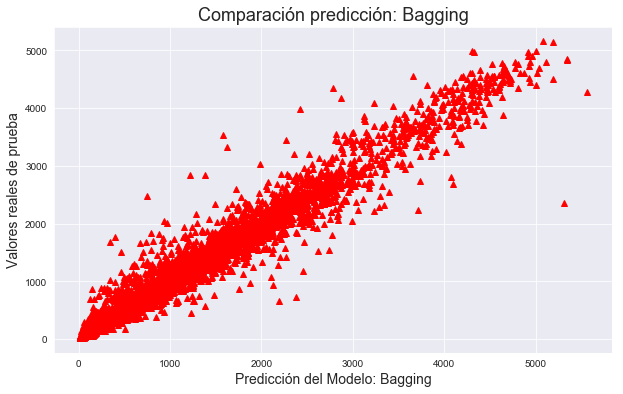

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_bagging, "^", color = 'r')
plt.title('Comparación predicción: Bagging', fontsize = 18)
plt.xlabel('Predicción del Modelo: Bagging', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()

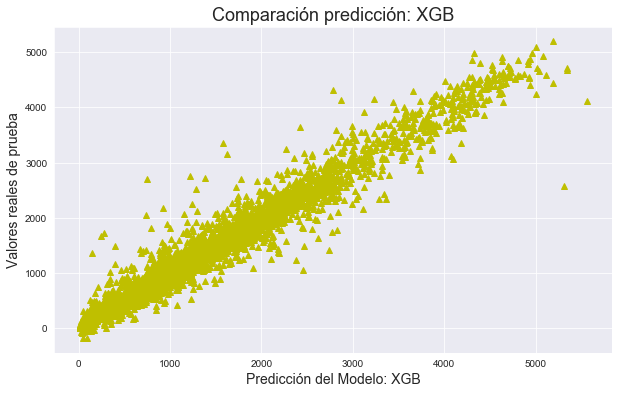

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_xgb, "^", color = 'y')
plt.title('Comparación predicción: XGB', fontsize = 18)
plt.xlabel('Predicción del Modelo: XGB', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()

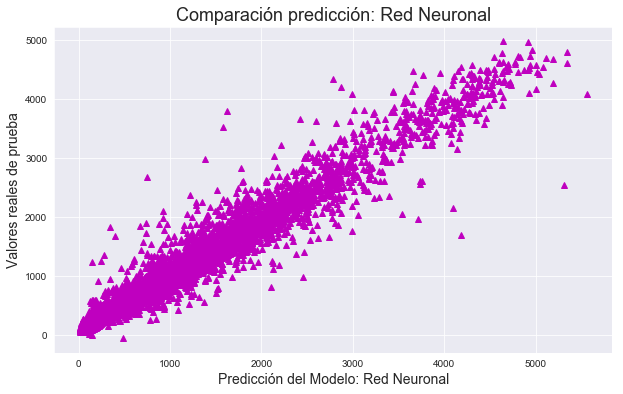

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_ann, "^", color = 'm')
plt.title('Comparación predicción: Red Neuronal', fontsize = 18)
plt.xlabel('Predicción del Modelo: Red Neuronal', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()

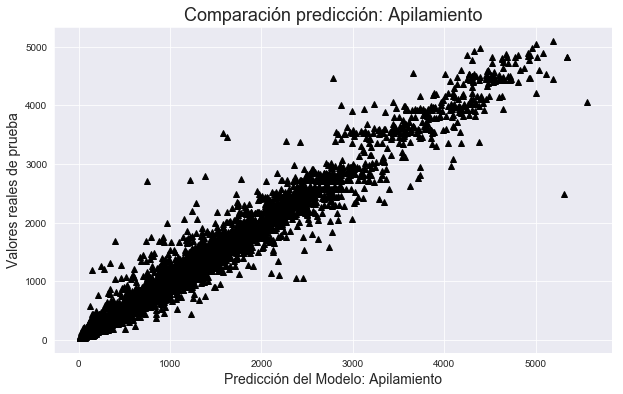

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test_orig, y_predict_orig_stack, "^", color = 'k')
plt.title('Comparación predicción: Apilamiento', fontsize = 18)
plt.xlabel('Predicción del Modelo: Apilamiento', fontsize = 14)
plt.ylabel('Valores reales de prueba', fontsize = 14)
plt.show()